In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv(r"C:\Users\Rida Malik\Downloads\1069_1940_compressed_PS_20174392719_1491204439457_log.csv\PS_20174392719_1491204439457_log.csv")

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


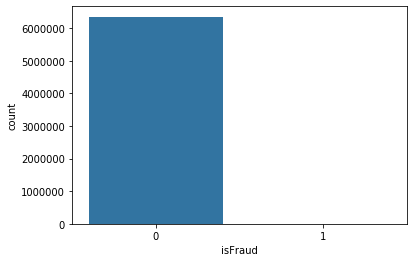

In [4]:
x=data['isFraud']
ax=sns.countplot(x=x,data=data)

In [11]:
data=data.drop(['nameOrig','nameDest','type'], axis=1)

In [12]:
from sklearn.utils import resample
y = data.isFraud
X = data.drop('isFraud', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
X = pd.concat([X_train, y_train], axis=1)
not_fraud = X[X.isFraud==0]
fraud = X[X.isFraud==1]
fraud_upsampled = resample(fraud,replace=True,n_samples=len(not_fraud),random_state=27)
upsampled = pd.concat([not_fraud, fraud_upsampled])
upsampled.isFraud.value_counts()

1    4765835
0    4765835
Name: isFraud, dtype: int64

In [14]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

C:\Users\Rida Malik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
ll = log_loss(y_test, y_pred_proba)

In [16]:
print('Accuracy of model on testing data is', acc)
print('F1 Score of model on testing data is', f1)
print('Log loss of model on testing data is', ll)

Accuracy of model on testing data is 0.9983805413493184
F1 Score of model on testing data is 0.708586889404514
Log loss of model on testing data is 0.01782866048587086


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1587154    1418]
 [   1158     925]]
